In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

# Helper Functions

#### read hichip-inferred peaks files

In [17]:
def read_peak_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                info = line.strip().split()
                peak_info = info[0:11]
                peak_data[count] = peak_info
                count = count + 1
    return(peak_data)

#### read chip-seq peaks files

In [3]:
def read_chipseq_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                info = line.strip().split()
                peak_info = info[0:3]
                peak_data[count] = peak_info
                count = count + 1
    return(peak_data)

In [4]:
def get_chipseq_path(samplesheet, sample_name):
    path=''
    with open(samplesheet) as fr:
        for line in fr:
            if sample_name in line:
                info = line.strip().split()
                path = info[4]
    return(path) 

#### generate pandas dataframe 

In [5]:
def generate_df():
    data = []
    glob_str = 'results/hicpro/*/hic_results'
    
    for file in glob.glob(glob_str):
        sample_name = file.split('/')[2]
        sample_info = []
        sample_info.append(sample_name)
        
        ## HiChIP-Peaks peaks
        hichip_peaks_path='results/peaks/hichip-peaks/{sn}/out_peaks.bed'.format(sn = sample_name)
        if os.path.exists(hichip_peaks_path):
            peak_info = read_peak_files(hichip_peaks_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append('')
            sample_info.append('')
            
        ## FitHiChIP peaks
        fithichip_path='results/peaks/fithichip/{sn}/MACS2_ExtSize/out_macs2_peaks.narrowPeak'.format(sn = sample_name)
        if os.path.exists(fithichip_path):
            peak_info = read_peak_files(fithichip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append('')
            sample_info.append('')
        
        ## Chip-seq peaks
        chip_path=get_chipseq_path('results/samplesheets/post-hicpro/peaks_files.samplesheet.without_header.tsv', sample_name)
        if os.path.exists(chip_path):
            peak_info = read_chipseq_files(chip_path)
            sample_info.append(len(peak_info))
            peak_sizes = []
            for peak in peak_info.items():
                peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
            sample_info.append(np.mean(peak_sizes))
        else:
            sample_info.append('')
            sample_info.append('')
        
        data.append(sample_info)
            
    df = pd.DataFrame(data)
    return df

# Generate Pandas Dataframe

In [6]:
df = generate_df()
df.columns = ["Sample Name", "# Peaks, HiChIP-Peaks","Avg Peak Size, HiChIP-Peaks", "# Peaks, FitHiChIP","Avg Peak Size, FitHiChIP", "# Peaks, Chip-Seq","Avg Peak Size, Chip-Seq"]

In [7]:
df = df.sort_values(by=["Sample Name"], ascending=True).reset_index(drop=True)
df

,Sample Name,"# Peaks, HiChIP-Peaks","Avg Peak Size, HiChIP-Peaks","# Peaks, FitHiChIP","Avg Peak Size, FitHiChIP","# Peaks, Chip-Seq","Avg Peak Size, Chip-Seq"
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,968,18837.628099,29588,174.290963,19491,9279.021087
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,1801,29690.376458,73185,187.950769,21727,4880.460901
2,293T.GSE128106.Homo_Sapiens.YY1.b1,43,21189.976744,986,182.723124,21267,8636.245263
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,2661,1281.321308,,,,
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,3468,1323.91436,,,,
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,823,1086.36695,,,,
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,2205,1375.680726,,,,
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,49,2554.061224,,,,
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,46,1515.434783,,,,
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,29585,2240.566571,,,,


In [8]:
print(len(df.loc[df['# Peaks, Chip-Seq'] != '']))

101


count        66.000000
mean      51188.727273
std       51492.392165
min         823.000000
25%       12154.000000
50%       32939.500000
75%       72440.250000
max      211864.000000
Name: Number of HiChIP Peaks (fithichip), dtype: float64

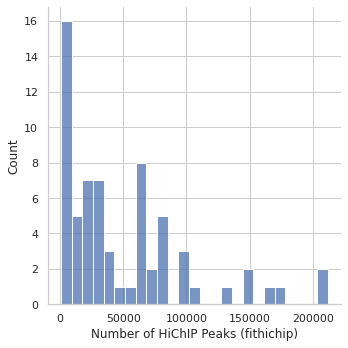

In [8]:
sns.displot(df, bins=25, x="Number of HiChIP Peaks (fithichip)")
df["Number of HiChIP Peaks (fithichip)"].describe()

count     66.000000
mean     348.153053
std      110.089686
min      174.290963
25%      252.733271
50%      336.029187
75%      435.412214
max      592.926123
Name: Average Peak Size, dtype: float64

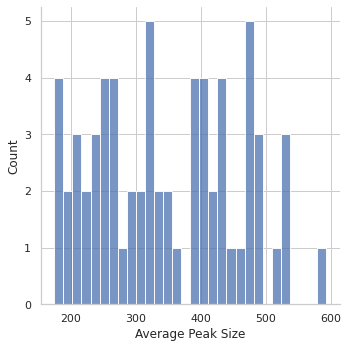

In [9]:
sns.displot(df, bins=30, x="Average Peak Size")
df["Average Peak Size"].describe()